# Normalización y Escalado de Datos

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Normalización
Es el proceso de transformar datos a un rango común, generalmente [0, 1]. Se utiliza cuando los datos no siguen una distribución normal, pero las características deben estar en el mismo rango para ciertos algoritmos, como redes neuronales o métodos basados en distancias.

$$
x' = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

Donde:
* 𝑥 es el valor original.
* 𝑚𝑖𝑛 𝑥  es el valor mínimo.
* 𝑚𝑎𝑥 𝑥  es el valor máximo.

##### Ejemplo 1.
Utilizando 10 valores aleatorios que no siguen una distribución normal y responde los siguientes interrogantes.

In [3]:
# Generar 10 valores aleatorios que no siguen una distribución normal
# Definir una semilla
np.random.seed(42)

data = np.random.randint(low=10, high=100, size=10)
df = pd.DataFrame(data, columns=['Valores'])

data

array([61, 24, 81, 70, 30, 92, 96, 84, 84, 97], dtype=int32)

1. ¿Cuál es el valor mínimo del conjunto de datos?
2. ¿Cuál es el valor máximo del conjunto de datos?
3. ¿Cómo se distribuyen los datos?
4. Crear un gráfico de dispersión

In [4]:
df.min()

Valores    24
dtype: int32

In [5]:
df.max()

Valores    97
dtype: int32

<Axes: ylabel='Frequency'>

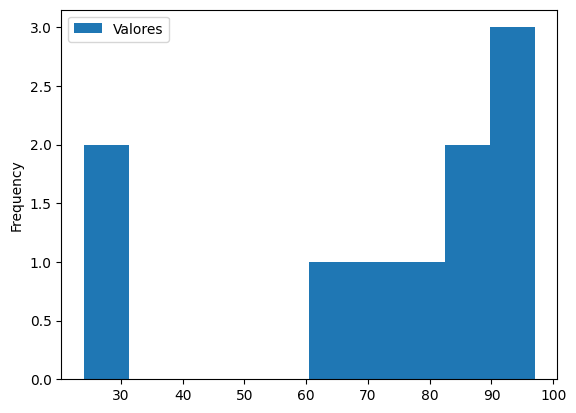

In [6]:
df.plot.hist()

In [7]:
val_norm = (df['Valores']-df['Valores'].min())/(df['Valores'].min()-df['Valores'].max())
val_norm

0   -0.506849
1   -0.000000
2   -0.780822
3   -0.630137
4   -0.082192
5   -0.931507
6   -0.986301
7   -0.821918
8   -0.821918
9   -1.000000
Name: Valores, dtype: float64

<Axes: ylabel='Density'>

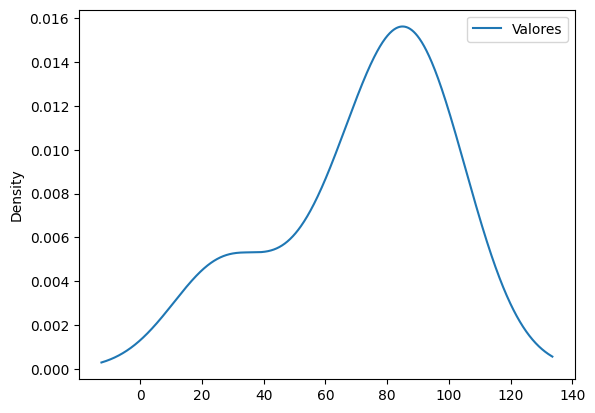

In [8]:
df.plot.kde()

<Axes: xlabel='Indice', ylabel='Valores'>

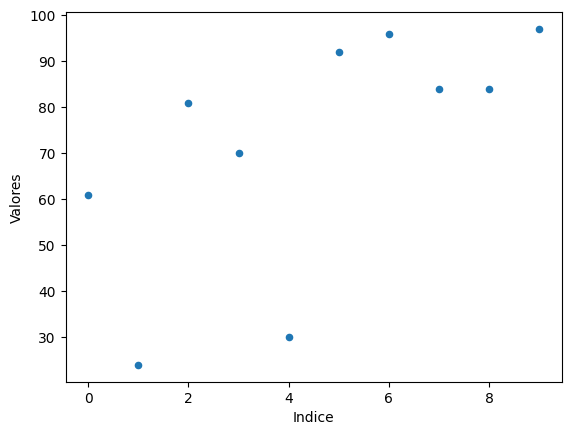

In [9]:
df['Indice'] = df.index
df.plot.scatter(x = 'Indice', y = 'Valores')

##### Ejemplo 2.
Normaliza las observaciones  y responde los siguientes interrogantes.
1. ¿Cuál es el valor mínimo del conjunto de datos?
2. ¿Cuál es el valor máximo del conjunto de datos?
3. ¿Cómo se distribuyen los datos?
4. Crear un gráfico de dispersión


In [10]:
df['val_norm'] = (df['Valores']-df['Valores'].min())/(df['Valores'].max()-df['Valores'].min())
df

,Valores,Indice,val_norm
0,61,0,0.506849
1,24,1,0.000000
2,81,2,0.780822
3,70,3,0.630137
4,30,4,0.082192
5,92,5,0.931507
6,96,6,0.986301
7,84,7,0.821918
8,84,8,0.821918
9,97,9,1.000000


In [11]:
df['val_norm'].min()

np.float64(0.0)

In [12]:
df['val_norm'].max()

np.float64(1.0)

<Axes: ylabel='Frequency'>

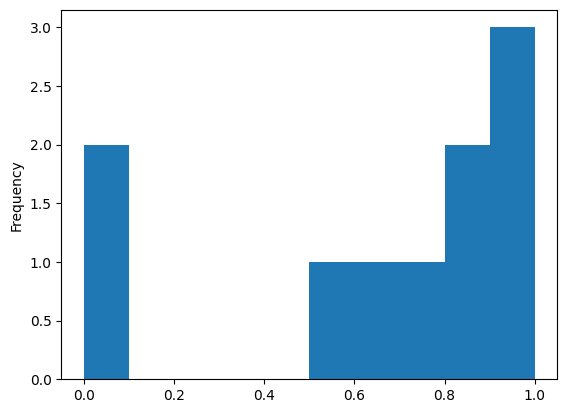

In [13]:
df['val_norm'].plot.hist()

<Axes: ylabel='Density'>

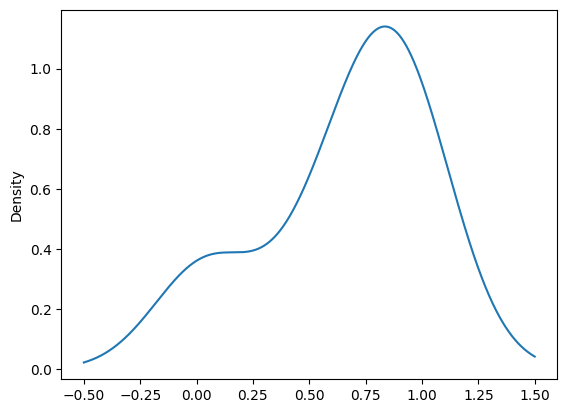

In [14]:
df['val_norm'].plot.kde()

<Axes: xlabel='Indice', ylabel='val_norm'>

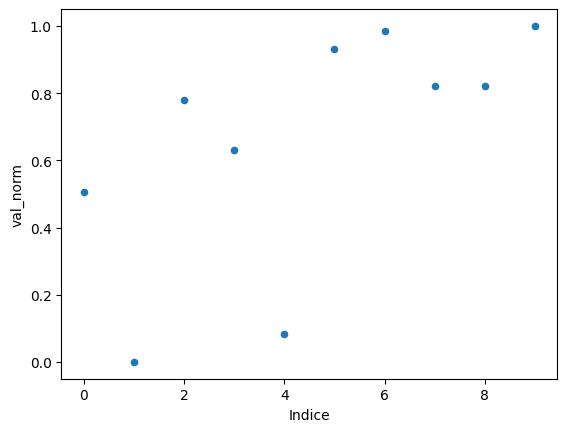

In [15]:
df.plot.scatter(x= 'Indice', y= 'val_norm')

### Normalización características
* Rango de valores: [0, 1].
* Utilizado cuando los datos no tienen una distribución gaussiana.
* Sensible a outliers.

### En Python

In [16]:
scaler_min_max = MinMaxScaler()
scaler_min_max.fit_transform(df[['Valores']])

array([[0.50684932],
       [0.        ],
       [0.78082192],
       [0.63013699],
       [0.08219178],
       [0.93150685],
       [0.98630137],
       [0.82191781],
       [0.82191781],
       [1.        ]])

## Escalado (Standardization)
Transforma los datos para que tengan media cero y desviación estándar uno. Es útil cuando los datos siguen una distribución normal o cuando se usan modelos que asumen dicha distribución, como regresión lineal o métodos basados en SVM

$$
z = \frac{x - \mu}{\sigma}
$$
Donde:
* 𝑥 es el valor original.
* 𝜇 es la media de los datos.
* 𝜎 es la desviación estándar de los datos.

##### Ejemplo 3
Utilizando los mismo datos del ejemplo del 1, responde las preguntas siguientes
1. ¿Cuál es la media del conjunto de datos?
2. ¿Cuál es la desviación estándar del conjunto de datos?
3. ¿Cómo se distribuyen los datos?
4. Crear un gráfico de dispersión

In [17]:
df['Valores'].mean()

np.float64(71.9)

In [18]:
df['Valores'].std()

np.float64(26.168046672739386)

<Axes: ylabel='Frequency'>

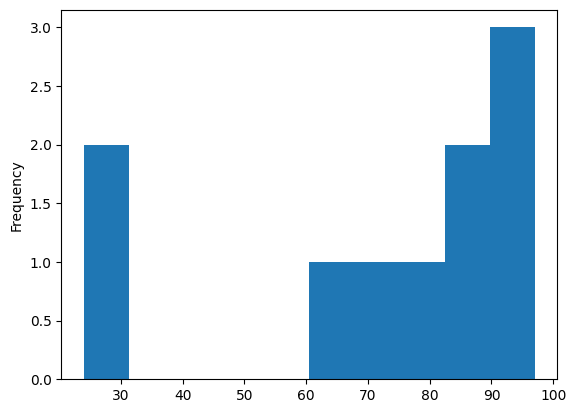

In [19]:
df['Valores'].plot.hist()

<Axes: xlabel='Indice', ylabel='Valores'>

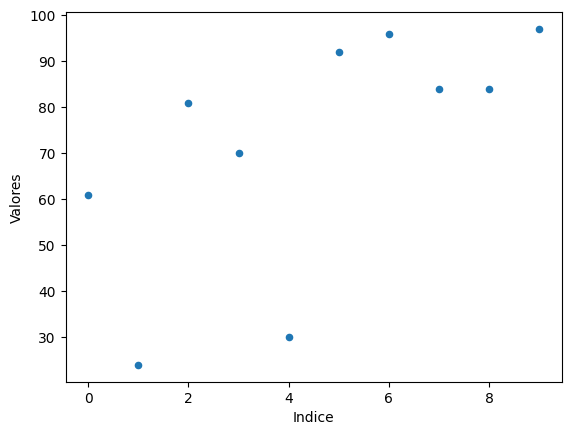

In [20]:
df.plot.scatter(x= 'Indice', y= 'Valores')

##### Ejemplo
Estandariza las observaciones y responde los siguientes interrogantes.
1. ¿Cuál es la media del conjunto de datos estandarizados?
2. ¿Cuál es la desviación estándar del conjunto de datos 
estandarizados?
3. ¿Cómo se distribuyen los datos estandarizados?
4. Crear un gráfico de dispersión


In [21]:
df['val_est'] = (df['Valores']-df['Valores'].mean())/df['Valores'].std()
df

,Valores,Indice,val_norm,val_est
0,61,0,0.506849,-0.416539
1,24,1,0.000000,-1.830477
2,81,2,0.780822,0.347752
3,70,3,0.630137,-0.072608
4,30,4,0.082192,-1.601189
5,92,5,0.931507,0.768112
6,96,6,0.986301,0.920971
7,84,7,0.821918,0.462396
8,84,8,0.821918,0.462396
9,97,9,1.000000,0.959185


In [22]:
df['val_est'].mean()

np.float64(-1.7763568394002506e-16)

In [23]:
df['val_est'].std()

np.float64(0.9999999999999998)

<Axes: ylabel='Frequency'>

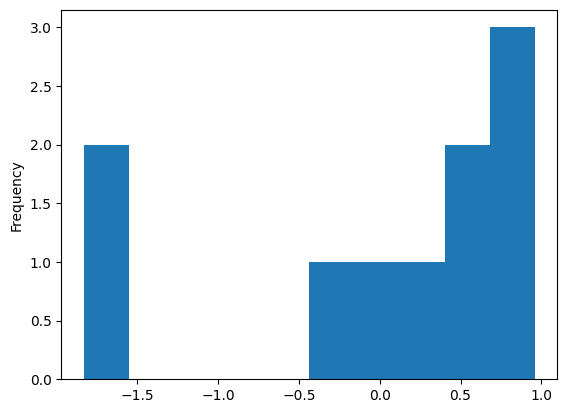

In [24]:
df['val_est'].plot.hist()

<Axes: xlabel='Indice', ylabel='val_est'>

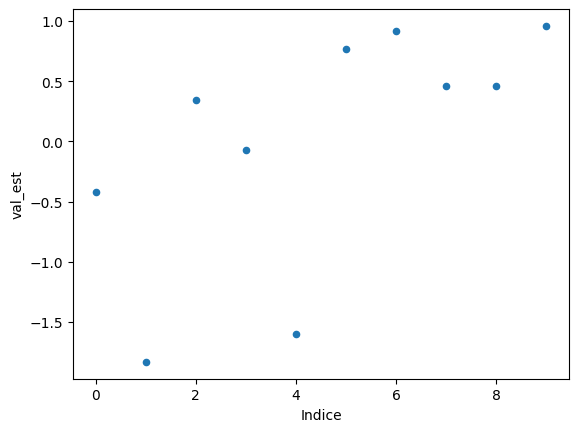

In [25]:
df.plot.scatter(x='Indice', y= 'val_est')

### Estandarización características
* Media = 0, Desviación estándar = 1.
* Adecuado cuando los datos tienen distribución gaussiana.
* Menos sensible a outliers que la normalización.

### En Python

In [26]:
# Estandarización (Standardization)
scaler_standard = StandardScaler()
scaler_standard.fit_transform(df[['Valores']])

array([[-0.43907017],
       [-1.92949187],
       [ 0.36656317],
       [-0.07653517],
       [-1.68780187],
       [ 0.80966152],
       [ 0.97078819],
       [ 0.48740818],
       [ 0.48740818],
       [ 1.01106985]])

In [27]:
df  # Reviso si los valores estandarizados con la formula son iguales a los estandarizados con scaler_standard.fit_transform(df)

,Valores,Indice,val_norm,val_est
0,61,0,0.506849,-0.416539
1,24,1,0.000000,-1.830477
2,81,2,0.780822,0.347752
3,70,3,0.630137,-0.072608
4,30,4,0.082192,-1.601189
5,92,5,0.931507,0.768112
6,96,6,0.986301,0.920971
7,84,7,0.821918,0.462396
8,84,8,0.821918,0.462396
9,97,9,1.000000,0.959185


## Implementación en Python con Datos Simulados

In [28]:
# Simulación de datos
np.random.seed(42)
data = np.random.randn(100, 3) * [10, 20, 30] + [50, 100, 150]  # Datos con diferentes escalas
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])
df


,Feature1,Feature2,Feature3
0,54.967142,97.234714,169.430656
1,65.230299,95.316933,142.975891
2,65.792128,115.348695,135.915768
3,55.425600,90.731646,136.028107
4,52.419623,61.734395,98.252465
...,...,...,...
95,30.479122,96.964298,167.649516
96,52.809919,87.546010,143.756332
97,45.069991,88.212705,175.488063
98,53.570155,86.141808,176.987996


Text(0.5, 1.0, 'Valores estandarizados')

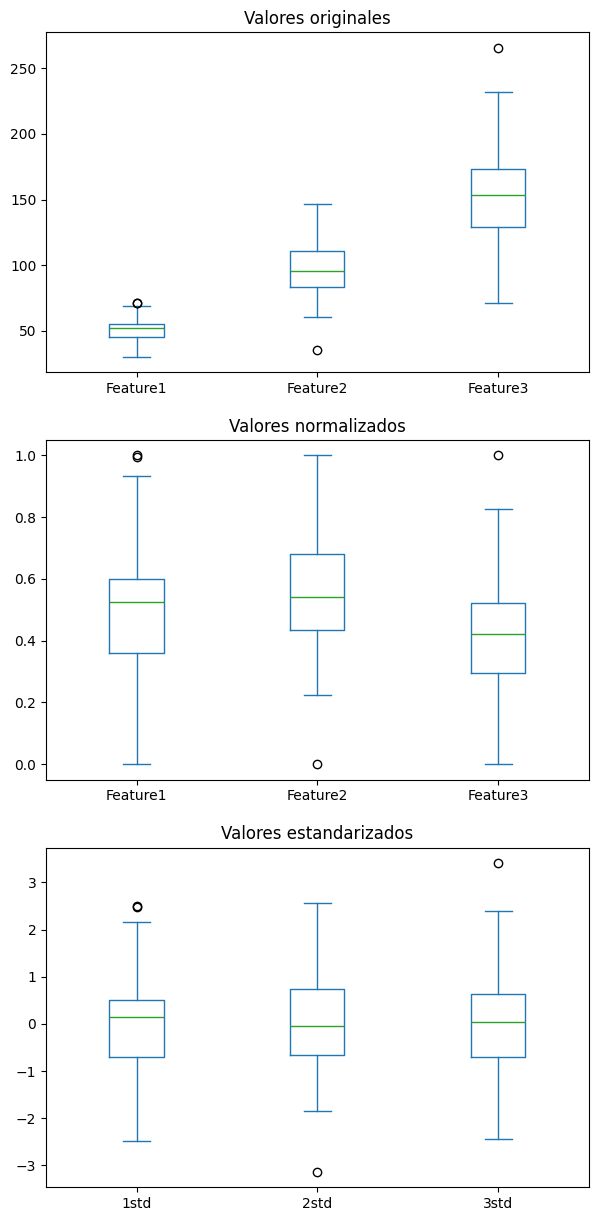

In [29]:
norm = pd.DataFrame(scaler_min_max.fit_transform(df), columns=df.columns) # Normalizar columnas
est = pd.DataFrame(scaler_standard.fit_transform(df), columns=['1std', '2std', '3std']) # Estandarizar columnas

# Crear subplots para agrupar de 3 en 3
fig, axes = plt.subplots(3, 1, figsize=(7, 15))  # 3 filas, 1 columna

df.plot.box(ax=axes[0])
axes[0].set_title('Valores originales')
norm.plot.box(ax=axes[1])
axes[1].set_title('Valores normalizados')
est.plot.box(ax=axes[2])
axes[2].set_title('Valores estandarizados')

Text(0.5, 1.0, 'Valores estandarizados')

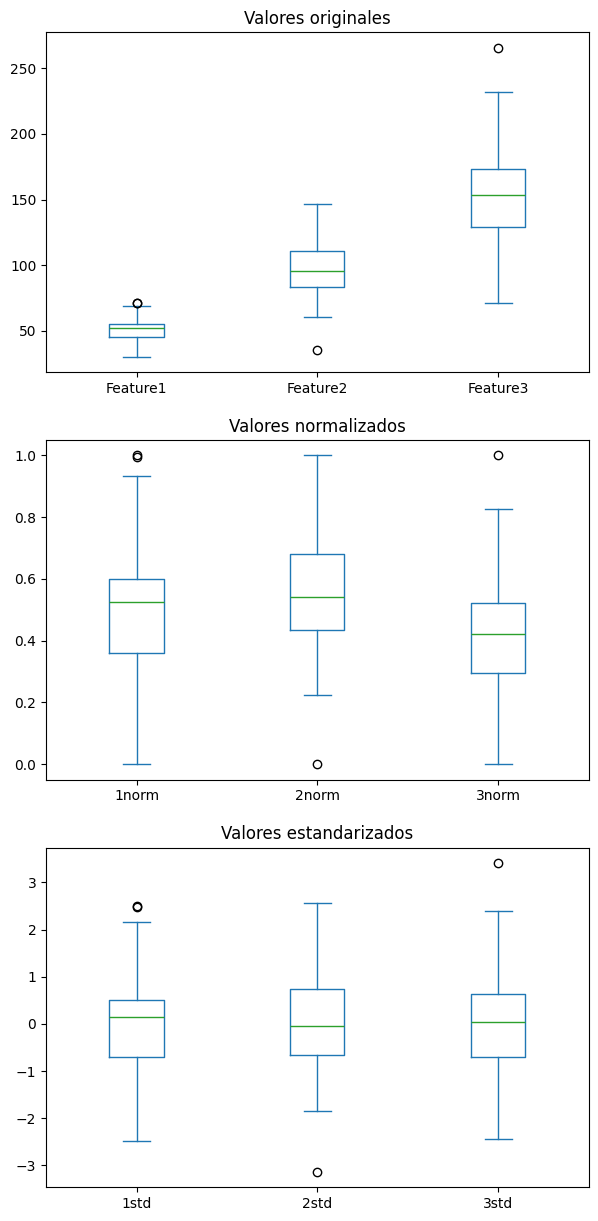

In [30]:
# Normalizar columnas
df[['1norm', '2norm', '3norm']] = scaler_min_max.fit_transform(df[['Feature1', 'Feature2', 'Feature3']])

# Estandarizar columnas
df[['1std', '2std', '3std']] = scaler_standard.fit_transform(df[['Feature1', 'Feature2', 'Feature3']])

# Crear subplots para agrupar de 3 en 3
fig, axes = plt.subplots(3, 1, figsize=(7, 15))  # 3 filas, 1 columna

df[['Feature1', 'Feature2', 'Feature3']].plot.box(ax=axes[0])
axes[0].set_title('Valores originales')
df[['1norm', '2norm', '3norm']].plot.box(ax=axes[1])
axes[1].set_title('Valores normalizados')
df[['1std','2std', '3std']].plot.box(ax=axes[2])
axes[2].set_title('Valores estandarizados')